<a href="https://colab.research.google.com/github/AirPro/Mod4HandsOnFreidrd/blob/main/Mod4HandsOnFreidrd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4 Hands On Traffic Sign Assignment
By: Robert Freid for the Deep Learning Mod 4 Assignment
## Mount the Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Mounting Google Drive Notes
Drive already mounted at /content/drive; <br>
To attempt to forcibly remount call: <br>
drive.mount('/content/drive',force_remout=True)
## Import Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # to plot accuracy
import cv2
import tensorflow as tf
from PIL import Image # to read image data
import os
from sklearn.model_selection import train_test_split # to split training and testing data
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout 

## Read the images and save them and their corresponding labels in lists

In [27]:
data = []
labels = []
classes = 43

# Copied Path: /content/drive/MyDrive/TrafficSignsData/myData

cur_path = "/content/drive/MyDrive/TrafficSignsData/myData"

# Retreiving the images and their labels

for i in range(classes):
  path = os.path.join(cur_path,str(i))
  images = os.listdir(path)
  for a in images:
    try:
      image = Image.open(path + '/' + a)
      image = image.resize((32, 32))
      image = np.array(image)
      data.append(image)
      labels.append(i)
    except:
      print('Error Loading Image')

## Save the data and labels as numpy arrays
## Divide training and testing sets

In [28]:
data = np.array(data)
labels = np.array(labels)
print('Data.shape')
print(data.shape)
print('Labels.shape')
print(labels.shape)

# Splitting training and testing data

X_train, X_test, y_train, y_test= train_test_split(data, labels, test_size=0.2, random_state=42)
print('train_test_split results')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Data.shape
(73139, 32, 32, 3)
Labels.shape
(73139,)
train_test_split results
(58511, 32, 32, 3) (14628, 32, 32, 3) (58511,) (14628,)


## One hot encodng for labels

In [29]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Define the Deep Learning Model 

In [55]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

## Show the Model Summary

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        1216      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        9280      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 6, 6, 64)         

## Plot the Model Diagram

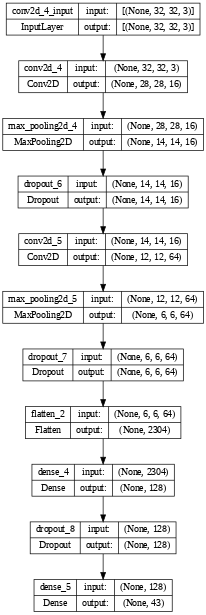

In [57]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', dpi=50,show_shapes=True, show_layer_names=True)

## Compile the Model

In [58]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Set Batch size and number of Epochs

In [59]:
epochsNum = 10
batchSize = 100

## Train the model

In [60]:
history=model.fit(X_train, y_train, epochs=epochsNum, batch_size=batchSize, validation_split=0.15, shuffle=True)

Epoch 1/10
498/498 [==============================] - 66s 130ms/step - loss: 4.1038 - accuracy: 0.0628 - val_loss: 3.4122 - val_accuracy: 0.0738
Epoch 2/10
498/498 [==============================] - 64s 129ms/step - loss: 3.2835 - accuracy: 0.1093 - val_loss: 2.5501 - val_accuracy: 0.3428
Epoch 3/10
498/498 [==============================] - 61s 123ms/step - loss: 2.4911 - accuracy: 0.2986 - val_loss: 1.3834 - val_accuracy: 0.5855
Epoch 4/10
498/498 [==============================] - 62s 124ms/step - loss: 1.7132 - accuracy: 0.4876 - val_loss: 0.7441 - val_accuracy: 0.7709
Epoch 5/10
498/498 [==============================] - 61s 123ms/step - loss: 1.2616 - accuracy: 0.6088 - val_loss: 0.5149 - val_accuracy: 0.8449
Epoch 6/10
498/498 [==============================] - 61s 123ms/step - loss: 1.0131 - accuracy: 0.6818 - val_loss: 0.3907 - val_accuracy: 0.8978
Epoch 7/10
498/498 [==============================] - 61s 123ms/step - loss: 0.8681 - accuracy: 0.7286 - val_loss: 0.3758 - val_ac

## Train versus Validation Training Loss

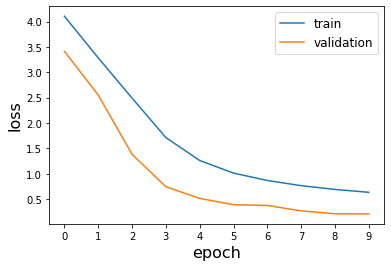

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'], loc='upper right', fontsize='large')
plt.ylabel('loss', fontsize=16)
plt.xlabel('epoch', fontsize=16)
plt.yticks()
plt.xticks(np.arange(0, epochsNum))
plt.show()

## Train versus Validation Accuracy

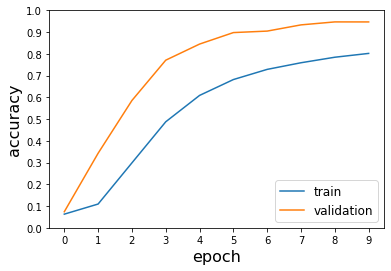

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch', fontsize=16)
plt.ylabel('accuracy', fontsize=16)
plt.yticks(np.arange(0.0, 1.05, 0.1))#, step=0.5))
plt.xticks(np.arange(0, epochsNum))# +1 )) step=10))
plt.legend(['train', 'validation'], loc='lower right', fontsize='large')
plt.show()

## Test the Model

In [38]:
pred_test = model.predict(X_test)
y_pred = pred_test.round()
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

458/458 [==============================] - 7s 15ms/step
Accuracy on test data: 0.068635493516922% 
 Error on test data: 0.931364506483078


## Decode the One Hot Encoder back to Labels

In [39]:
decoded_y_test = tf.argmax(y_test, axis=1)
decoded_prediction = tf.argmax(pred_test, axis=1)

print(decoded_y_test.shape)
print(decoded_prediction.shape)

(14628,)
(14628,)


## Confusion Matrix

In [40]:
tf.math.confusion_matrix(decoded_y_test, decoded_prediction)

<tf.Tensor: shape=(43, 43), dtype=int32, numpy=
array([[  0,  85,   0, ...,   0,   0,   0],
       [  0, 999,   0, ...,   0,   0,   0],
       [  0, 514,   0, ...,   0,   0,   0],
       ...,
       [  0, 156,   0, ...,   0,   0,   0],
       [  0,  91,   0, ...,   0,   0,   0],
       [  0,  73,   0, ...,   0,   0,   0]], dtype=int32)>

## Confusion Matrix using Seaborn

Text(0.5, 1.0, 'Confusion Matrix')

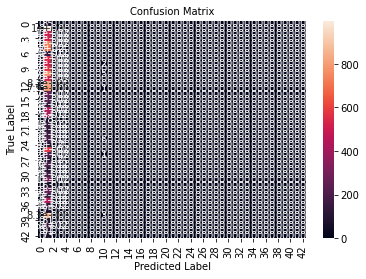

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm = confusion_matrix(decoded_y_test, decoded_prediction)

sn.heatmap(cm,annot=True) # fmt='d', xticklabels=labels[name],yticklabels=labels['name], cbar=False
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Confusion Matrix", fontsize=10)